# Семинар 1 "EDA и генерация новых признаков"
Цель семинара: освоить основные этапы исследования данных и генерации новых признаков

План семинара:
1. Введение - вспомним, что такое "соревновательный DS", посмотрим на платформу Kaggle
2. Практика - решим три задачи на подготовку датасета
3. Подведение итогов - проанализируем и обсудим решения

# Регистрация аккаунта Kaggle

 В 2022 году появились проблемы с регистрацией и последующей верификацией аккаунтов на платформе Kaggle для пользователей из России. Время ожидания может растянуться на несколько дней, поэтому лучше сразу заняться этим вопросом, не откладывая на потом. Ниже несколько советов по ускорению этой процедуры.

* Обязательно указывать код страны перед номером телефона (+7 для России).
* Не 100%, но лучше регистрироваться на Google почту или не из домена .ru.
* Если смс не приходит, писать в поддержку (отвечают не быстро); если не отвечают больше 2-х дней, можно писать повторно.
* Если есть знакомые заграницей, попросить верифицироваться по их номеру.





# Kaggle Playground Competition "Steel Plate Defect Prediction"
[Ссылка на сореву](https://www.kaggle.com/competitions/playground-series-s4e3/overview)

https://www.kaggle.com/code/ivanblch/notebook7285cc3b9d - версия ноутбука на Kaggle

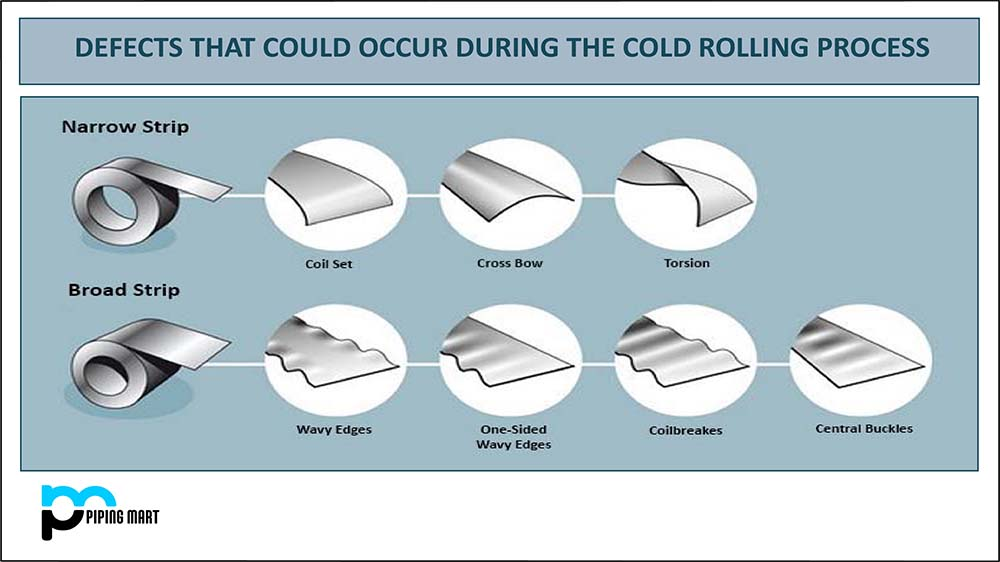

Посмотрим на данные соревнования

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
train_path = 'https://drive.google.com/uc?export=download&id=1gZLZiTJA9Ua1U2bKskr180Zo7DSsB2H-'
test_path = 'https://drive.google.com/uc?export=download&id=1gZsciRytep0OcBw5oCgYWjtEGxy3-ezd'
ss_path = 'https://drive.google.com/uc?export=download&id=1TH30T0we1u_2yPb627VizLchtLwNqLGd'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(ss_path)
train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


### Задание 1 (15 мин.) EDA

Стандартное исследование датасета:
1. Посмотреть глазами на признаки
2. Какие признаки присутствуют в датасете и сколько (числовые, категориальные)?
3. Исследовать на пропуски
4. Исследовать таргеты (пропуски, баланс классов, присутствуют ли сэмплы с несколькими видами поломок)
5. Исследовать схожесть трэйна и теста

Визуализация:
1. Построить гистограммы признаков для трэйна и теста средствами pandas
2. Построить correlation matrix
3. Построить график баланса таргетов

Выводы по графикам и EDA.

Какие видите потенциальные сложности?

Как бы начали решать задачу?

# Задание 2 (10 мин)

Как считается метрика:
To calculate the final score, AUC is calculated for each of the 7 defect categories and then averaged. In other words, the score is the average of the individual AUC of each predicted column.

1. Подготовить данные
2. Обучить Catboost
3. Посмотреть важность признаков
4. Посчитать метрику
5. *Предсказать тест, отправить сабмишен на ЛБ

In [ ]:
!pip install catboost -q

In [ ]:
from catboost import CatBoostClassifier

Переводим таргеты к задаче мультиклассификации

In [ ]:
targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# убираем сэмплы с несколькими метками
train = train[train[targets].sum(axis=1) <= 1]

# добавляем столбец target
sparse_labels = train[targets].values.copy()
sparse_labels = np.concatenate([sparse_labels, 1 - sparse_labels.sum(1)[:, np.newaxis]], axis=1)
train['target'] = np.argmax(sparse_labels, axis=1)

X = train.drop(columns=targets + ['target', 'id'])
y = train['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    # заполнить
)

In [ ]:
model = CatBoostClassifier(random_seed=43,
                           #ignored_features=[],
                           eval_metric='AUC',
                           )

model.fit(
    # заполняем
)
print(model.get_best_score())

In [ ]:
# смотрим важность признаков
model.get_feature_importance(prettified=True)

In [ ]:
y_pred = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred, multi_class='ovo')

In [ ]:
# подготовка файла для сабмишена
submission = pd.DataFrame(
    model.predict_proba(test.drop(columns=['id']))[:, :-1],
    columns=targets,
    index=test.id
).reset_index()

submission.head(5)

In [ ]:
submission.to_csv('submission.csv', index=False)

# Задание 3 (25 мин) - Генерация новых признаков


### 3.1 Разминка (5 мин)

Задача: Сгенерируй на основе имеющихся фичей новую `killer_feature`, но не простую, а такую, по которой можно разделить классы однозначно.

In [ ]:
path = 'https://stepik.org/media/attachments/lesson/779914/make_it_easy.csv'
df = pd.read_csv(path)

df.head()

,feature_1,feature_2,feature_3,label
0,2.5,0.00,58,B
1,2.5,0.02,61,B
2,2.5,0.05,33,B
3,2.5,0.07,89,B
4,2.5,0.10,58,B


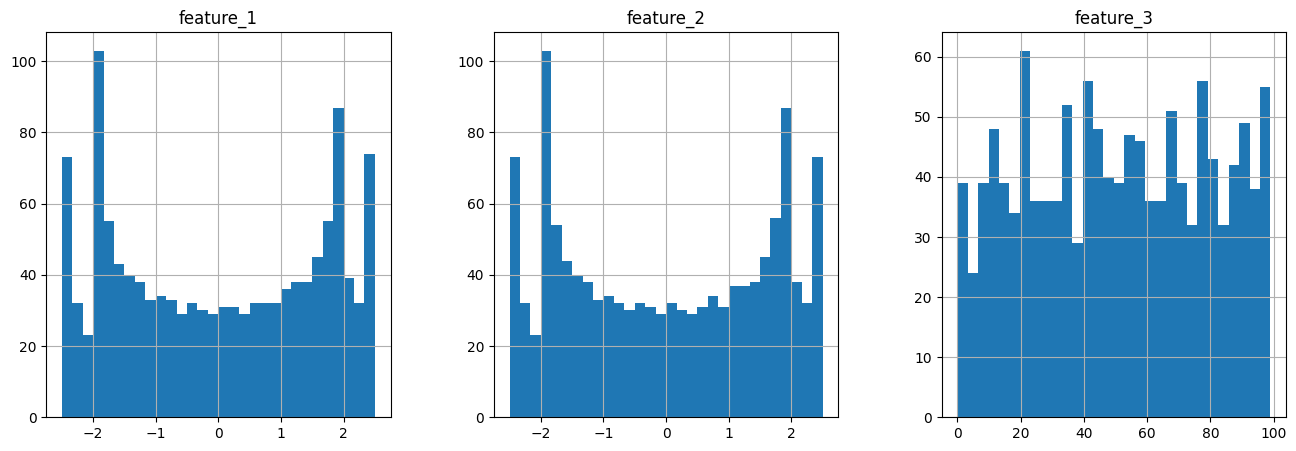

In [ ]:
df.hist(bins=30, layout=(1,3), figsize=(16,5));

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.3, random_state=43)

rf = RandomForestClassifier(random_state=43)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9417989417989417

Неплохо, но можно получить единицу

In [ ]:
df['killer_feature'] =

In [ ]:
# Возможно этот график натолкнёт на мысли
sns.pairplot(df[['feature_1', 'feature_2', 'feature_3', 'label']], hue="label")
plt.show();

## Эксперименты
1. Попробовать убрать сильноскореллированные признаки
2. Подумать какие признаки можно дополнительно сгенерировать?
3. Добавить новые признаки в датасет, обучить модель
4. Посмотреть как изменились метрика и важность фичей
5. *Заслать сабмишен на ЛБ с новыми фичами (проверить валидацию)